In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import dataset
data = pd.read_csv('Thesis_dataset.csv')

In [3]:
data.head()

,ID,Name,Gender,Present Address,Using transportation,Apply for another varsity,Suppose admission,Waiver,KNPwCIfIbDA,"If any, give reason",IUBAT Choosing Reason
0,20103131,Tanvir Hossain,Male,"Uttara, Dhaka",0,1,1,100,0,NaN,Well_developed
1,19303025,Abdullah Munim Khan,Male,"Mirpur, Dhaka",1,1,0,15,0,NaN,Quality_education.
2,20103147,Md Azhar Uddin,Male,Narayanganj,0,0,1,15,1,pandemic,Teaching_quality
3,19103235,Farjana Pervin Ruma,Female,Gazipur,0,1,0,100,0,NaN,NaN
4,19203033,Shraboni Saha Puja,Female,"Mirpur, Dhaka",0,1,0,30,0,NaN,Waiver


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         405 non-null    int64 
 1   Name                       405 non-null    object
 2   Gender                     405 non-null    object
 3   Present Address            405 non-null    object
 4   Using transportation       405 non-null    int64 
 5   Apply for another varsity  405 non-null    int64 
 6   Suppose admission          405 non-null    int64 
 7   Waiver                     405 non-null    int64 
 8   KNPwCIfIbDA                405 non-null    int64 
 9   If any, give reason        139 non-null    object
 10  IUBAT Choosing Reason      362 non-null    object
dtypes: int64(6), object(5)
memory usage: 34.9+ KB


In [5]:
data.describe()

,ID,Using transportation,Apply for another varsity,Suppose admission,Waiver,KNPwCIfIbDA
count,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000
mean,1.820530e+07,0.464198,0.696296,0.622222,41.125926,0.412346
std,1.761185e+06,0.499333,0.460425,0.485431,33.251315,0.492866
min,2.010320e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.720306e+07,0.000000,0.000000,0.000000,15.000000,0.000000
50%,1.820308e+07,0.000000,1.000000,1.000000,30.000000,0.000000
75%,1.910323e+07,1.000000,1.000000,1.000000,60.000000,1.000000
max,2.020306e+07,1.000000,1.000000,1.000000,100.000000,1.000000


In [6]:
data.shape

(405, 11)

In [7]:
# See the null values
data.isnull().sum()

ID                             0
Name                           0
Gender                         0
Present Address                0
Using transportation           0
Apply for another varsity      0
Suppose admission              0
Waiver                         0
KNPwCIfIbDA                    0
If any, give reason          266
IUBAT Choosing Reason         43
dtype: int64

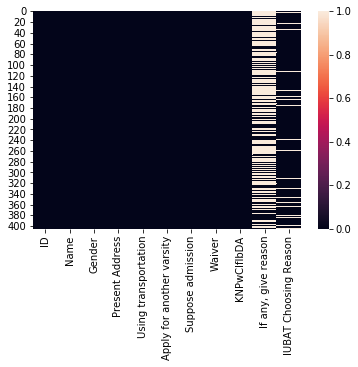

In [8]:
# show the null values
sns.heatmap(data.isnull())

(array([153.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 252.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

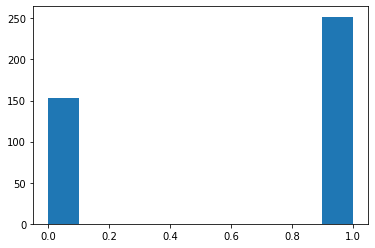

In [9]:
#Ploting y value
plt.hist(data['Suppose admission'])

In [10]:
def bar_chart(feature):
    admitted = data[data['Suppose admission']==1][feature].value_counts()
    not_admitted = data[data['Suppose admission']==0][feature].value_counts()
    df = pd.DataFrame([admitted,not_admitted])
    df.index = ['admitted','not_admitted']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

# Gender

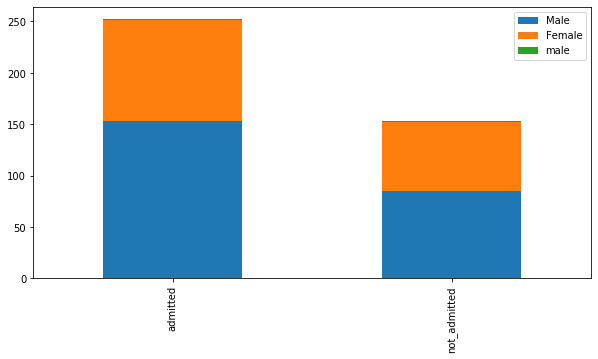

In [11]:
bar_chart('Gender')

In [12]:
data['Gender'].replace('male', 'Male', inplace=True)

In [13]:
pd.value_counts(data['Gender'])

Male      240
Female    165
Name: Gender, dtype: int64

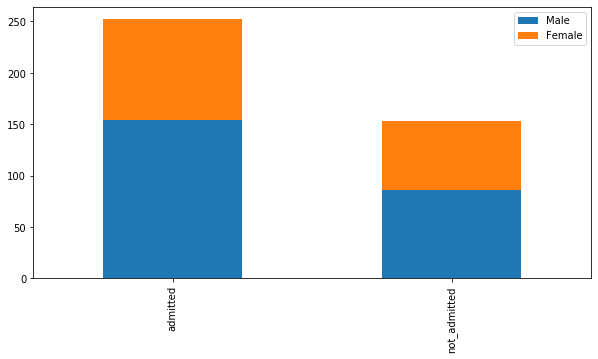

In [14]:
bar_chart('Gender')

# Present Address

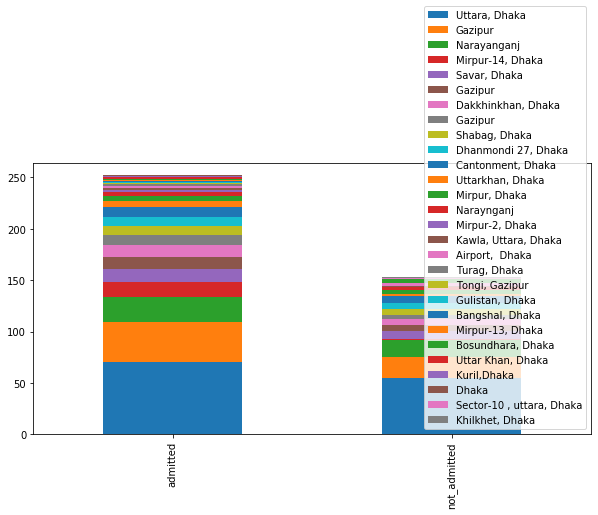

In [15]:
bar_chart('Present Address')

In [16]:
pd.value_counts(data['Present Address'])

Uttara, Dhaka                125
Gazipur                       59
Narayanganj                   42
Savar, Dhaka                  21
Dakkhinkhan, Dhaka            17
Gazipur                       17
Cantonment, Dhaka             16
Dhanmondi 27, Dhaka           15
Mirpur-14, Dhaka              15
Shabag, Dhaka                 15
Gazipur                       14
Uttarkhan, Dhaka               8
Mirpur, Dhaka                  8
Naraynganj                     7
Airport,  Dhaka                5
Bosundhara, Dhaka              5
Kawla, Uttara, Dhaka           3
Turag, Dhaka                   2
Mirpur-2, Dhaka                2
Gulistan, Dhaka                1
Tongi, Gazipur                 1
Bangshal, Dhaka                1
Khilkhet, Dhaka                1
Kuril,Dhaka                    1
Uttar Khan, Dhaka              1
Dhaka                          1
Mirpur-13, Dhaka               1
Sector-10 , uttara, Dhaka      1
Name: Present Address, dtype: int64

In [17]:
data.replace('Sector-10 , uttara, Dhaka', 'Uttara, Dhaka', inplace=True)

In [18]:
data.replace('Uttar Khan, Dhaka', 'Uttarkhan, Dhaka ', inplace=True)

In [19]:
data.replace('Uttarkhan, Dhaka ', 'Uttarkhan, Dhaka', inplace=True)

In [20]:
data.replace('Gazipur ', 'Gazipur', inplace=True)

In [21]:
data.replace('Gazipur  ', 'Gazipur', inplace=True)

In [22]:
pd.value_counts(data['Present Address'])

Uttara, Dhaka           126
Gazipur                  90
Narayanganj              42
Savar, Dhaka             21
Dakkhinkhan, Dhaka       17
Cantonment, Dhaka        16
Dhanmondi 27, Dhaka      15
Shabag, Dhaka            15
Mirpur-14, Dhaka         15
Uttarkhan, Dhaka          9
Mirpur, Dhaka             8
Naraynganj                7
Airport,  Dhaka           5
Bosundhara, Dhaka         5
Kawla, Uttara, Dhaka      3
Mirpur-2, Dhaka           2
Turag, Dhaka              2
Kuril,Dhaka               1
Dhaka                     1
Tongi, Gazipur            1
Gulistan, Dhaka           1
Bangshal, Dhaka           1
Khilkhet, Dhaka           1
Mirpur-13, Dhaka          1
Name: Present Address, dtype: int64

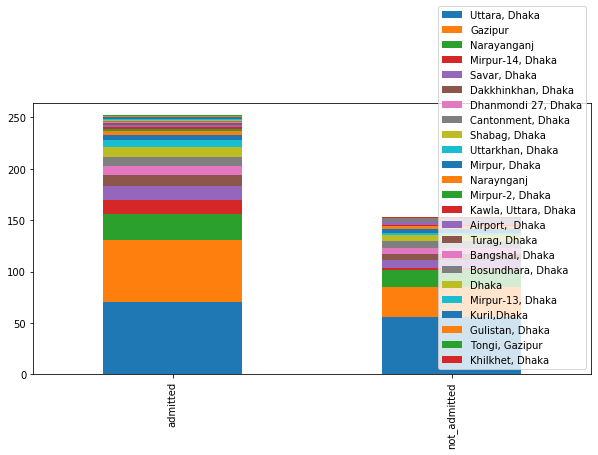

In [23]:
bar_chart('Present Address')

# Using transportation

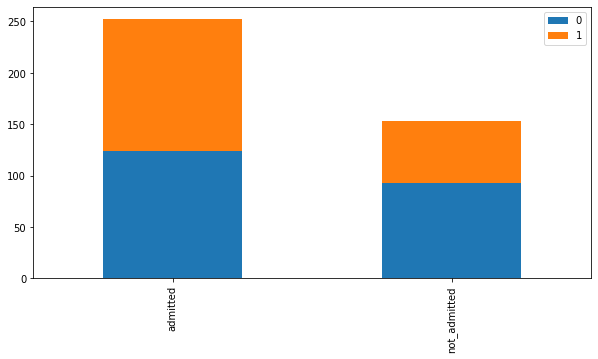

In [24]:
bar_chart('Using transportation')

#  Apply for another varsity

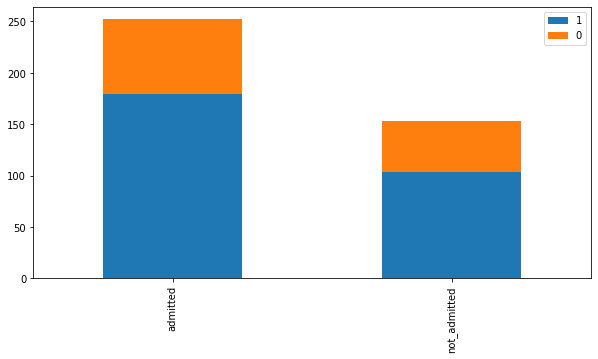

In [25]:
bar_chart('Apply for another varsity')

# Waiver

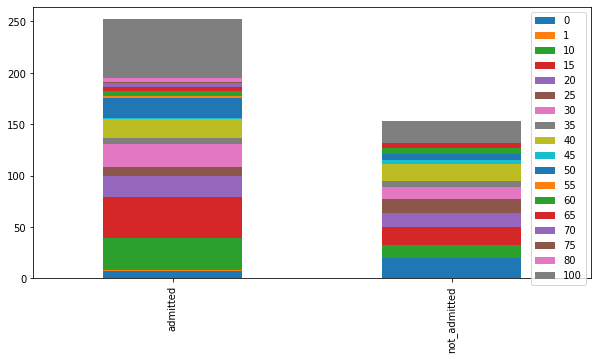

In [26]:
bar_chart('Waiver')

In [27]:
pd.value_counts(data['Waiver'])

100    78
15     58
10     43
30     35
20     35
40     34
0      27
50     26
25     21
35     12
60     11
65      9
45      5
80      4
70      4
55      1
75      1
1       1
Name: Waiver, dtype: int64

In [28]:
# here 1 is outlire because there is no 1% waiver in iubat so we will replace into mode of the column
data['Waiver'].replace(1, data['Waiver'].median() , inplace=True)

In [29]:
pd.value_counts(data['Waiver'])

100    78
15     58
10     43
30     36
20     35
40     34
0      27
50     26
25     21
35     12
60     11
65      9
45      5
80      4
70      4
55      1
75      1
Name: Waiver, dtype: int64

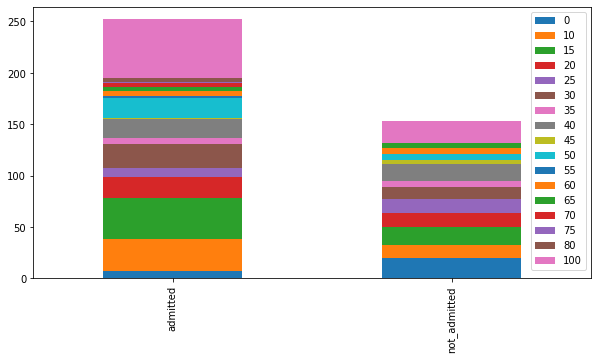

In [30]:
bar_chart('Waiver')

# KNPwCIfIbDA (Known person who come to know the information but did not admit

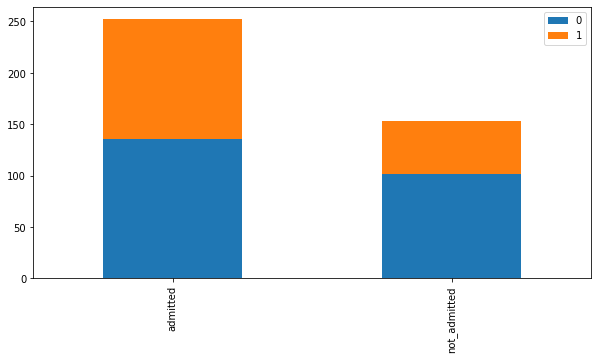

In [31]:
bar_chart('KNPwCIfIbDA')

In [32]:
pd.value_counts(data['KNPwCIfIbDA'])

0    238
1    167
Name: KNPwCIfIbDA, dtype: int64

# If any, give reason

In [33]:
data.head()

,ID,Name,Gender,Present Address,Using transportation,Apply for another varsity,Suppose admission,Waiver,KNPwCIfIbDA,"If any, give reason",IUBAT Choosing Reason
0,20103131,Tanvir Hossain,Male,"Uttara, Dhaka",0,1,1,100,0,NaN,Well_developed
1,19303025,Abdullah Munim Khan,Male,"Mirpur, Dhaka",1,1,0,15,0,NaN,Quality_education.
2,20103147,Md Azhar Uddin,Male,Narayanganj,0,0,1,15,1,pandemic,Teaching_quality
3,19103235,Farjana Pervin Ruma,Female,Gazipur,0,1,0,100,0,NaN,NaN
4,19203033,Shraboni Saha Puja,Female,"Mirpur, Dhaka",0,1,0,30,0,NaN,Waiver


In [34]:
pd.value_counts(data['If any, give reason'])

Admitted_another_private_varsity    28
Finance                             18
Got_chance_in_public_varsity        18
Pressure                            14
Dress_code                           7
Money                                7
Family_problem                       6
Went_abroad                          6
Pandemic                             4
Dress_code                           3
Low_gpa_in_hsc                       3
Quality                              3
Requirements_not_matched             3
Distance                             2
Drop_semster                         2
Personal_reason                      2
pandemic                             2
Transport                            2
No_English_Department.               1
Transportation                       1
Education_system                     1
Maintanance_of_cgpa                  1
Admitted_IUBAT                       1
Rules                                1
Tuition_fees                         1
English                  

In [35]:
data.replace('Transport  ', 'Transportation', inplace=True)

In [36]:
data.replace('Transport ', 'Transportation', inplace=True)
data.replace('Transport', 'Transportation', inplace=True)

In [37]:
data.replace('Transportation ', 'Transportation', inplace=True)
data.replace('Transportation  ', 'Transportation', inplace=True)

In [38]:
data.replace('Dress_code ', 'Dress_code', inplace=True)

In [39]:
data.replace('No_English_Department. ', 'No_Engilish_Department', inplace=True)

In [40]:
data['If any, give reason'].replace(1, data['If any, give reason'].mode() , inplace=True)

In [41]:
pd.value_counts(data['If any, give reason'])

Admitted_another_private_varsity    28
Finance                             18
Got_chance_in_public_varsity        18
Pressure                            14
Dress_code                          10
Money                                7
Family_problem                       6
Went_abroad                          6
Pandemic                             4
Requirements_not_matched             3
Quality                              3
Low_gpa_in_hsc                       3
Transportation                       3
Drop_semster                         2
Distance                             2
pandemic                             2
Personal_reason                      2
Admitted_IUBAT                       1
Tuition_fees                         1
English                              1
Maintanance_of_cgpa                  1
Education_system                     1
Rules                                1
Grading_system                       1
No_Engilish_Department               1
Name: If any, give reason

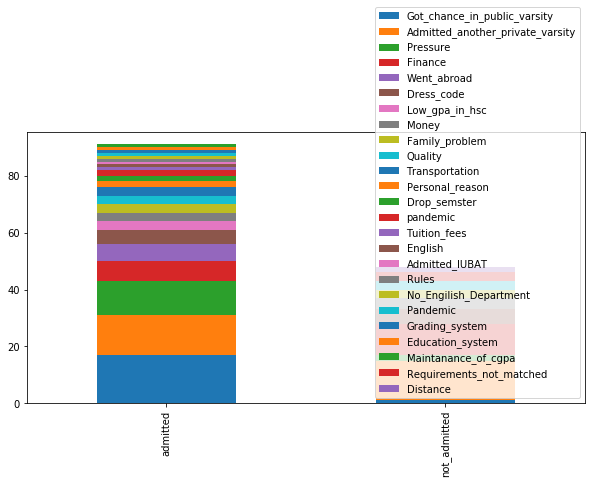

In [42]:
bar_chart('If any, give reason')

# IUBAT Choosing Reason

In [43]:
pd.set_option('display.max_rows', 500)
pd.value_counts(data['IUBAT Choosing Reason'])

Waiver                       47
Beautiful_campus             37
Suggestion                   25
Gurdian's_choice             25
Transportation               22
100_waiver                   17
Loan_system                  16
Environment                  13
Near                         10
For_mechanical_dept.         10
IEB_membership               10
Quality_education.            9
Learning_environment          7
Good_for_diploma_holders      6
Education_system              5
Well_developed                5
Teaching_quality              4
Gurdian's choice              4
For_Agriculture_dept          3
Transportation facility       3
Educational_background        3
Favourite_University          3
No option without IUBAT       3
Beautiful_campus.             3
Beautiful_campus              3
Finance                       2
Best_option                   2
100_waiver.                   2
Learning_environment          2
 Waiver                       2
Environment                   2
No reaso

In [44]:
data.replace(['Weaver',' ','waiver','Waiver ','Wavier ',' Waiver', 'Wavier','100_waiver', '100_waiver.',
              '100 waiver','Scholarship'], 'Waiver', inplace=True)

In [45]:
data.replace(['Environment','Environment. ','Environment ','Environment   ','Beautiful_campus  ',
              'Learning_environment','Learning environment','Learning_environment   ',
              'Beautiful_campus.  ','Green campus  ',
              'For campus','For the campus'],'Beautiful_campus', inplace=True)

In [46]:
data.replace(["Friend's suggestion","Cousin's suggestion","Frined's suggestion"],'Suggestion', inplace=True)

In [47]:
data.replace(["Gurdian's choice","father's choice","Father's choice"],"Gurdian's_choice", inplace=True)

In [48]:
data.replace(['Transportation ','Transporation','Transporation ','Transportation facility'],
             'Transportation',inplace=True)

In [49]:
data.replace(['loan opportunity','Loan facility'],'Loan_system',inplace=True)

In [50]:
data.replace(['In nearest location','near at my house'],'Near',inplace=True)

In [51]:
data.replace(['For_mechanical_dept. '],'For_mechanical_department', inplace=True)

In [52]:
data.replace(['Quality_education. ','Education_system'],'Quality_education',inplace=True)

In [53]:
data.replace(['Best for deploma student','good for diploma engineer'],'Good_for_diploma_holders',inplace=True)

In [54]:
data.replace(['Teacinga_quality','Teacing quality'],'Teaching_quality',inplace=True)

In [55]:
data.replace('eductaional background','Educational_background',inplace=True)

In [56]:
data.replace(['No option without IUBAT','No_option'],'No option without it',inplace=True)

In [57]:
data.replace(["I don't know","don't know"],'No reason',inplace=True)

In [58]:
data.replace(['Rules and regulation'],'Rules',inplace=True)

In [59]:
data.replace('Well)_reputed_University ','Well_reputed_University',inplace=True)

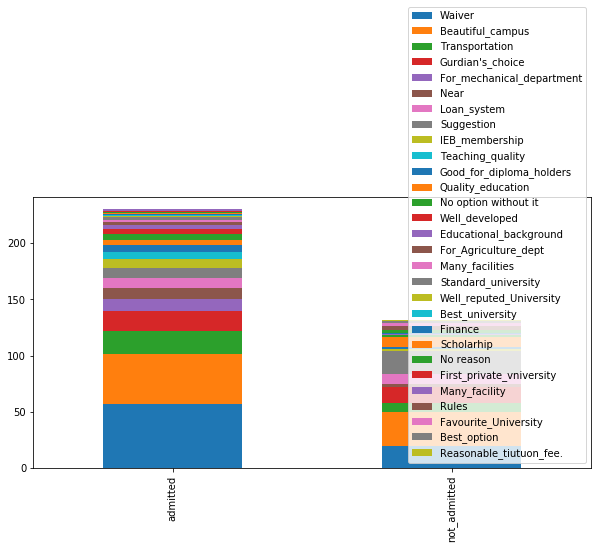

In [60]:
bar_chart('IUBAT Choosing Reason')

In [61]:
pd.value_counts(data['IUBAT Choosing Reason'])

Waiver                       77
Beautiful_campus             75
Gurdian's_choice             32
Suggestion                   29
Transportation               28
Loan_system                  18
Quality_education            14
Near                         13
For_mechanical_department    10
IEB_membership               10
Good_for_diploma_holders      8
No option without it          6
Teaching_quality              6
Well_developed                5
Educational_background        4
No reason                     4
For_Agriculture_dept          3
Favourite_University          3
Rules                         3
Finance                       2
Standard_university           2
Best_option                   2
Many_facilities               2
First_private_vniversity      1
Scholarhip                    1
Best_university               1
Reasonable_tiutuon_fee.       1
Well_reputed_University       1
Many_facility                 1
Name: IUBAT Choosing Reason, dtype: int64

# Filling the missing value

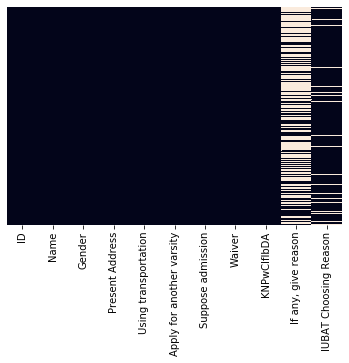

In [62]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False)

In [63]:
data['If any, give reason'] = data['If any, give reason'].fillna(data['If any, give reason'].mode()[0])

In [64]:
data['IUBAT Choosing Reason'] = data['IUBAT Choosing Reason'].fillna(data['IUBAT Choosing Reason'].mode()[0])

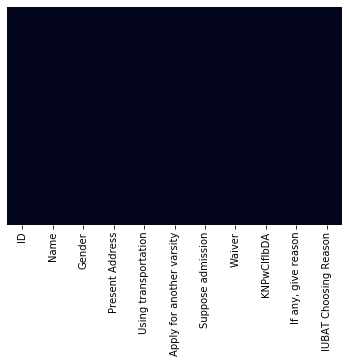

In [65]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False)

In [66]:
data.isnull().sum()

ID                           0
Name                         0
Gender                       0
Present Address              0
Using transportation         0
Apply for another varsity    0
Suppose admission            0
Waiver                       0
KNPwCIfIbDA                  0
If any, give reason          0
IUBAT Choosing Reason        0
dtype: int64

In [67]:
data.head()

,ID,Name,Gender,Present Address,Using transportation,Apply for another varsity,Suppose admission,Waiver,KNPwCIfIbDA,"If any, give reason",IUBAT Choosing Reason
0,20103131,Tanvir Hossain,Male,"Uttara, Dhaka",0,1,1,100,0,Admitted_another_private_varsity,Well_developed
1,19303025,Abdullah Munim Khan,Male,"Mirpur, Dhaka",1,1,0,15,0,Admitted_another_private_varsity,Quality_education
2,20103147,Md Azhar Uddin,Male,Narayanganj,0,0,1,15,1,pandemic,Teaching_quality
3,19103235,Farjana Pervin Ruma,Female,Gazipur,0,1,0,100,0,Admitted_another_private_varsity,Waiver
4,19203033,Shraboni Saha Puja,Female,"Mirpur, Dhaka",0,1,0,30,0,Admitted_another_private_varsity,Waiver


In [68]:
# Feature engineering and droping column
data['Gender'].replace(['Male','Female'],[0,1],inplace=True)

In [69]:
data.head()

,ID,Name,Gender,Present Address,Using transportation,Apply for another varsity,Suppose admission,Waiver,KNPwCIfIbDA,"If any, give reason",IUBAT Choosing Reason
0,20103131,Tanvir Hossain,0,"Uttara, Dhaka",0,1,1,100,0,Admitted_another_private_varsity,Well_developed
1,19303025,Abdullah Munim Khan,0,"Mirpur, Dhaka",1,1,0,15,0,Admitted_another_private_varsity,Quality_education
2,20103147,Md Azhar Uddin,0,Narayanganj,0,0,1,15,1,pandemic,Teaching_quality
3,19103235,Farjana Pervin Ruma,1,Gazipur,0,1,0,100,0,Admitted_another_private_varsity,Waiver
4,19203033,Shraboni Saha Puja,1,"Mirpur, Dhaka",0,1,0,30,0,Admitted_another_private_varsity,Waiver


In [70]:
data.drop(['ID','Name'],axis=1,inplace=True)

In [71]:
data.head()

,Gender,Present Address,Using transportation,Apply for another varsity,Suppose admission,Waiver,KNPwCIfIbDA,"If any, give reason",IUBAT Choosing Reason
0,0,"Uttara, Dhaka",0,1,1,100,0,Admitted_another_private_varsity,Well_developed
1,0,"Mirpur, Dhaka",1,1,0,15,0,Admitted_another_private_varsity,Quality_education
2,0,Narayanganj,0,0,1,15,1,pandemic,Teaching_quality
3,1,Gazipur,0,1,0,100,0,Admitted_another_private_varsity,Waiver
4,1,"Mirpur, Dhaka",0,1,0,30,0,Admitted_another_private_varsity,Waiver


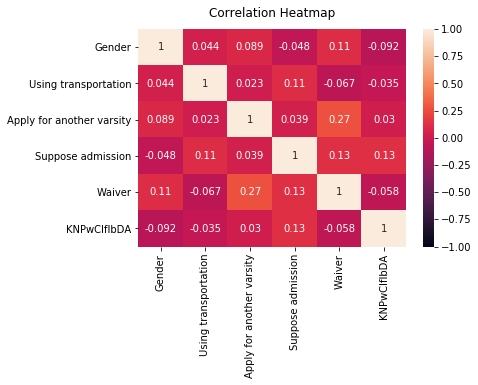

In [72]:
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [73]:
# label encoding the data 
#from sklearn.preprocessing import LabelEncoder 
  
#le = LabelEncoder() 
  
#data['Present Address']= le.fit_transform(data['Present Address']) 
#data['If any, give reason']= le.fit_transform(data['If any, give reason']) 
#data['IUBAT Choosing Reason']=le.fit_transform(data['IUBAT Choosing Reason'])

In [74]:
data.head()

,Gender,Present Address,Using transportation,Apply for another varsity,Suppose admission,Waiver,KNPwCIfIbDA,"If any, give reason",IUBAT Choosing Reason
0,0,"Uttara, Dhaka",0,1,1,100,0,Admitted_another_private_varsity,Well_developed
1,0,"Mirpur, Dhaka",1,1,0,15,0,Admitted_another_private_varsity,Quality_education
2,0,Narayanganj,0,0,1,15,1,pandemic,Teaching_quality
3,1,Gazipur,0,1,0,100,0,Admitted_another_private_varsity,Waiver
4,1,"Mirpur, Dhaka",0,1,0,30,0,Admitted_another_private_varsity,Waiver


In [75]:
data.shape

(405, 9)

In [76]:
columns=['Present Address','Waiver','If any, give reason','IUBAT Choosing Reason']
columns

['Present Address', 'Waiver', 'If any, give reason', 'IUBAT Choosing Reason']

In [77]:
def category_onehot_multcols(multicolumns):
    df_final = final_df
    i = 0
    for fields in multicolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i+=1
        
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [78]:
final_df = data

In [79]:
final_df.shape

(405, 9)

In [80]:
final_df = category_onehot_multcols(columns)

Present Address
Waiver
If any, give reason
IUBAT Choosing Reason


In [81]:
final_df.shape

(405, 96)

In [82]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [83]:
final_df.shape

(405, 92)

In [84]:
final_df.head()

,Gender,Using transportation,Apply for another varsity,Suppose admission,KNPwCIfIbDA,"Bangshal, Dhaka","Bosundhara, Dhaka","Cantonment, Dhaka","Dakkhinkhan, Dhaka",Dhaka,...,No option without it,No reason,Reasonable_tiutuon_fee.,Scholarhip,Standard_university,Suggestion,Teaching_quality,Waiver,Well_developed,Well_reputed_University
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [85]:
# Split into train test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(final_df, test_size=0.25, random_state=42)

In [86]:
train.shape,test.shape

((303, 92), (102, 92))

In [87]:
y_test = train['Suppose admission']
X_test = train.drop('Suppose admission', axis=1)

In [88]:
# preparing data for modeling
target = train['Suppose admission']
train_data = train.drop('Suppose admission', axis=1)

In [89]:
target.shape, train_data.shape

((303,), (303, 91))

# Modeling

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Decision Tree

In [92]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.61290323 0.64516129 0.58064516 0.56666667 0.56666667 0.73333333
 0.7        0.76666667 0.5        0.76666667]


In [93]:
# decision tree score
round(np.mean(score)*100,2)

64.39

# Random Forest

In [94]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.70967742 0.80645161 0.74193548 0.6        0.7        0.66666667
 0.73333333 0.83333333 0.53333333 0.86666667]


In [95]:
# random forest score
round(np.mean(score)*100, 2)

71.91

# Logistic Regression

In [96]:
clf = LogisticRegression()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.58064516 0.58064516 0.67741935 0.76666667 0.6        0.5
 0.66666667 0.8        0.63333333 0.86666667]


In [97]:
# Logistic Regression score
round(np.mean(score)*100, 2)

66.72

In [98]:
# Logistic Regression using roc_auc
clf = LogisticRegression()
score = cross_val_score(clf, train_data, target, cv=k_fold, scoring='roc_auc')
print(score)

[0.63445378 0.64545455 0.80769231 0.785      0.53703704 0.40669856
 0.69683258 0.77       0.48086124 0.912     ]


In [99]:
# Logistic Regression score
round(np.mean(score)*100, 2)

66.76

In [100]:
clf.fit(train_data, target)
clf.score(X_test, y_test)

0.7524752475247525

# Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
cross_val = KFold(n_splits=10, random_state=42)
score = cross_val_score(clf, train_data, target, cv=cross_val, scoring='roc_auc')
print(score)

[0.73464912 0.6875     0.65454545 0.73883929 0.75       0.57954545
 0.61111111 0.61764706 0.58522727 0.66742081]


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [102]:
# Naive Bayes score
round(np.mean(score)*100, 2)

66.26

In [103]:
clf.fit(train_data, target)
clf.score(X_test, y_test)

0.5643564356435643

# k-nearest neighbor

In [104]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
cross_val = KFold(n_splits=10, random_state=42)
score = cross_val_score(clf, train_data, target, cv=cross_val, scoring='roc_auc')
print(score)

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.57017544 0.74583333 0.60681818 0.83258929 0.795      0.64488636
 0.71875    0.73529412 0.60227273 0.81447964]


In [105]:
# k-nearest neighbor score
round(np.mean(score)*100, 2)

70.66

In [106]:
clf.fit(train_data, target)
clf.score(X_test, y_test)

0.801980198019802

In [107]:
prediction = clf.predict(X_test)
prediction

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,

In [121]:
X_test.head(20)

,Gender,Using transportation,Apply for another varsity,KNPwCIfIbDA,"Bangshal, Dhaka","Bosundhara, Dhaka","Cantonment, Dhaka","Dakkhinkhan, Dhaka",Dhaka,"Dhanmondi 27, Dhaka",...,No option without it,No reason,Reasonable_tiutuon_fee.,Scholarhip,Standard_university,Suggestion,Teaching_quality,Waiver,Well_developed,Well_reputed_University
75,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
113,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
390,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# xgboost

In [108]:
import xgboost
clf=xgboost.XGBRegressor()
cross_val = KFold(n_splits=10, random_state=42)
score = cross_val_score(clf, train_data, target, cv=cross_val, scoring='roc_auc')
print(score)

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[22:40:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [109]:
# xgboost score
round(np.mean(score)*100, 2)

67.85

In [110]:
clf.fit(train_data, target)
clf.score(X_test, y_test)

[22:40:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.42531039240370583

In [111]:
import xgboost
classifier=xgboost.XGBRegressor()
regressor=xgboost.XGBRegressor()


In [112]:
booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]

In [113]:
# Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2,3,5,10,15]
booster = ['gbtree','gblinear']
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score
}


In [114]:
# random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [115]:
random_cv.fit(train_data,target)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.7min finished


[22:42:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [116]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=15, min_child_weight=2, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [117]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [118]:
regressor.fit(train_data,target)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [119]:
regressor.score(X_test, y_test)

0.5398868973528232